# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 254.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 165.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.5/808.5 kB 641.

!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

### Setup Kaggle API Key

In [2]:
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
import json
kaggle_username = "lamaibrahem"
kaggle_key = "b30f641aacb525e0af9e4a9fc6a5a918"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

100% 189k/189k [00:00<00:00, 532kB/s]
100% 189k/189k [00:00<00:00, 532kB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('/content/train.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [9]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset.
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [10]:
predictor = TabularPredictor(label="count", problem_type="regression",eval_metric="root_mean_squared_error").fit(train_data=train.drop(columns=["casual", "registered"]),time_limit=600,presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20240809_043601"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          8
Memory Avail:       49.08 GB / 50.99 GB (96.2%)
Disk Space Avail:   165.82 GB / 201.23 GB (82.4%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will b

(_ray_fit pid=6496) [1000]	valid_set's rmse: 137.712
(_ray_fit pid=6494) [5000]	valid_set's rmse: 125.681 [repeated 24x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)


(_dystack pid=6099) 	-131.9758	 = Validation score   (-root_mean_squared_error)
(_dystack pid=6099) 	14.48s	 = Training   runtime
(_dystack pid=6099) 	4.54s	 = Validation runtime
(_dystack pid=6099) Fitting model: LightGBM_BAG_L1 ... Training model for up to 78.76s of the 127.52s of remaining time.
(_dystack pid=6099) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.02%)
(_ray_fit pid=6490) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 7x across cluster]
(_ray_fit pid=6490) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 7x across cluster]
(_ray_fit pid=6490)  [repeated 14x across cluster]
(_ray_fit pid=6490) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 7x across cluster]
(_ray_fit pid=6490) This will raise in a future version. [repeated 7x across cluster]
(_ray_fit pid=6490)

(_ray_fit pid=6875) [1000]	valid_set's rmse: 124.896 [repeated 13x across cluster]


(_dystack pid=6099) 	-131.8496	 = Validation score   (-root_mean_squared_error)
(_dystack pid=6099) 	4.63s	 = Training   runtime
(_dystack pid=6099) 	0.92s	 = Validation runtime
(_dystack pid=6099) Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 71.17s of the 119.94s of remaining time.
(_ray_fit pid=6877) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 8x across cluster]
(_ray_fit pid=6877) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 8x across cluster]
(_ray_fit pid=6877)  [repeated 16x across cluster]
(_ray_fit pid=6877) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 8x across cluster]
(_ray_fit pid=6877) This will raise in a future version. [repeated 8x across cluster]
(_ray_fit pid=6877)   warnings.warn(msg, FutureWarning) [repeated 8x across cluster]
(_dystack pid=6099) 	-119.5485	 = Validation score   (-root_mean_squared_error)
(

(_ray_fit pid=8364) [1000]	valid_set's rmse: 72.0848 [repeated 7x across cluster]


(_dystack pid=6099) 	-73.3514	 = Validation score   (-root_mean_squared_error)
(_dystack pid=6099) 	7.44s	 = Training   runtime
(_dystack pid=6099) 	1.5s	 = Validation runtime
(_dystack pid=6099) Fitting model: LightGBM_BAG_L2 ... Training model for up to 32.0s of the 31.95s of remaining time.
(_dystack pid=6099) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.02%)
(_ray_fit pid=8363) /usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:  [repeated 7x across cluster]
(_ray_fit pid=8363) Dask dataframe query planning is disabled because dask-expr is not installed. [repeated 7x across cluster]
(_ray_fit pid=8363)  [repeated 14x across cluster]
(_ray_fit pid=8363) You can install it with `pip install dask[dataframe]` or `conda install dask`. [repeated 7x across cluster]
(_ray_fit pid=8363) This will raise in a future version. [repeated 7x across cluster]
(_ray_fit pid=8363)   wa

### Review AutoGluon's training run with ranking of models that did the best.

In [11]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                        model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         WeightedEnsemble_L3  -50.786363  root_mean_squared_error      11.053796  306.927793                0.000820           0.076827            3       True         24
1      NeuralNetFastAI_BAG_L2  -51.942479  root_mean_squared_error       9.893404  292.087309                0.260503          20.558527            2       True         20
2      RandomForestMSE_BAG_L2  -53.568402  root_mean_squared_error      10.220564  283.294227                0.587663          11.765445            2       True         17
3        ExtraTreesMSE_BAG_L2  -54.185449  root_mean_squared_error      10.204810  274.526994                0.571908           2.998212            2       True         19
4              XGBoost_BAG_L2  -55.039333  root_mean_squared_error       9.760

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'CatBoost_r177_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'NeuralNetTorch_r79_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'Sta

### Create predictions from test dataset

In [12]:
predictions = predictor.predict(test)
predictions.head()

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


,count
0,23.112318
1,40.856384
2,45.437538
3,46.958511
4,49.559441


#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [13]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

,count
count,6493.000000
mean,100.548187
std,88.760635
min,1.095455
25%,22.507538
50%,67.339005
75%,168.410583
max,349.795532


In [14]:
# How many negative values do we have?
(predictions<0).sum()

0

In [15]:
# Set them to zero
if (predictions<0).sum() > 0:
    predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [16]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [17]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:01<00:00, 120kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [18]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission.csv               2024-08-09 04:47:27  first raw submission               complete  1.80247      1.80247       
submission_new_features.csv  2024-08-09 04:19:30  new features                       complete  1.70049      1.70049       
submission.csv               2024-08-09 04:07:22  first raw submission               complete  1.80572      1.80572       
submission_new_hpo.csv       2024-08-07 23:03:27  new features with hyperparameters  error                                


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>, <Axes: >]], dtype=object)

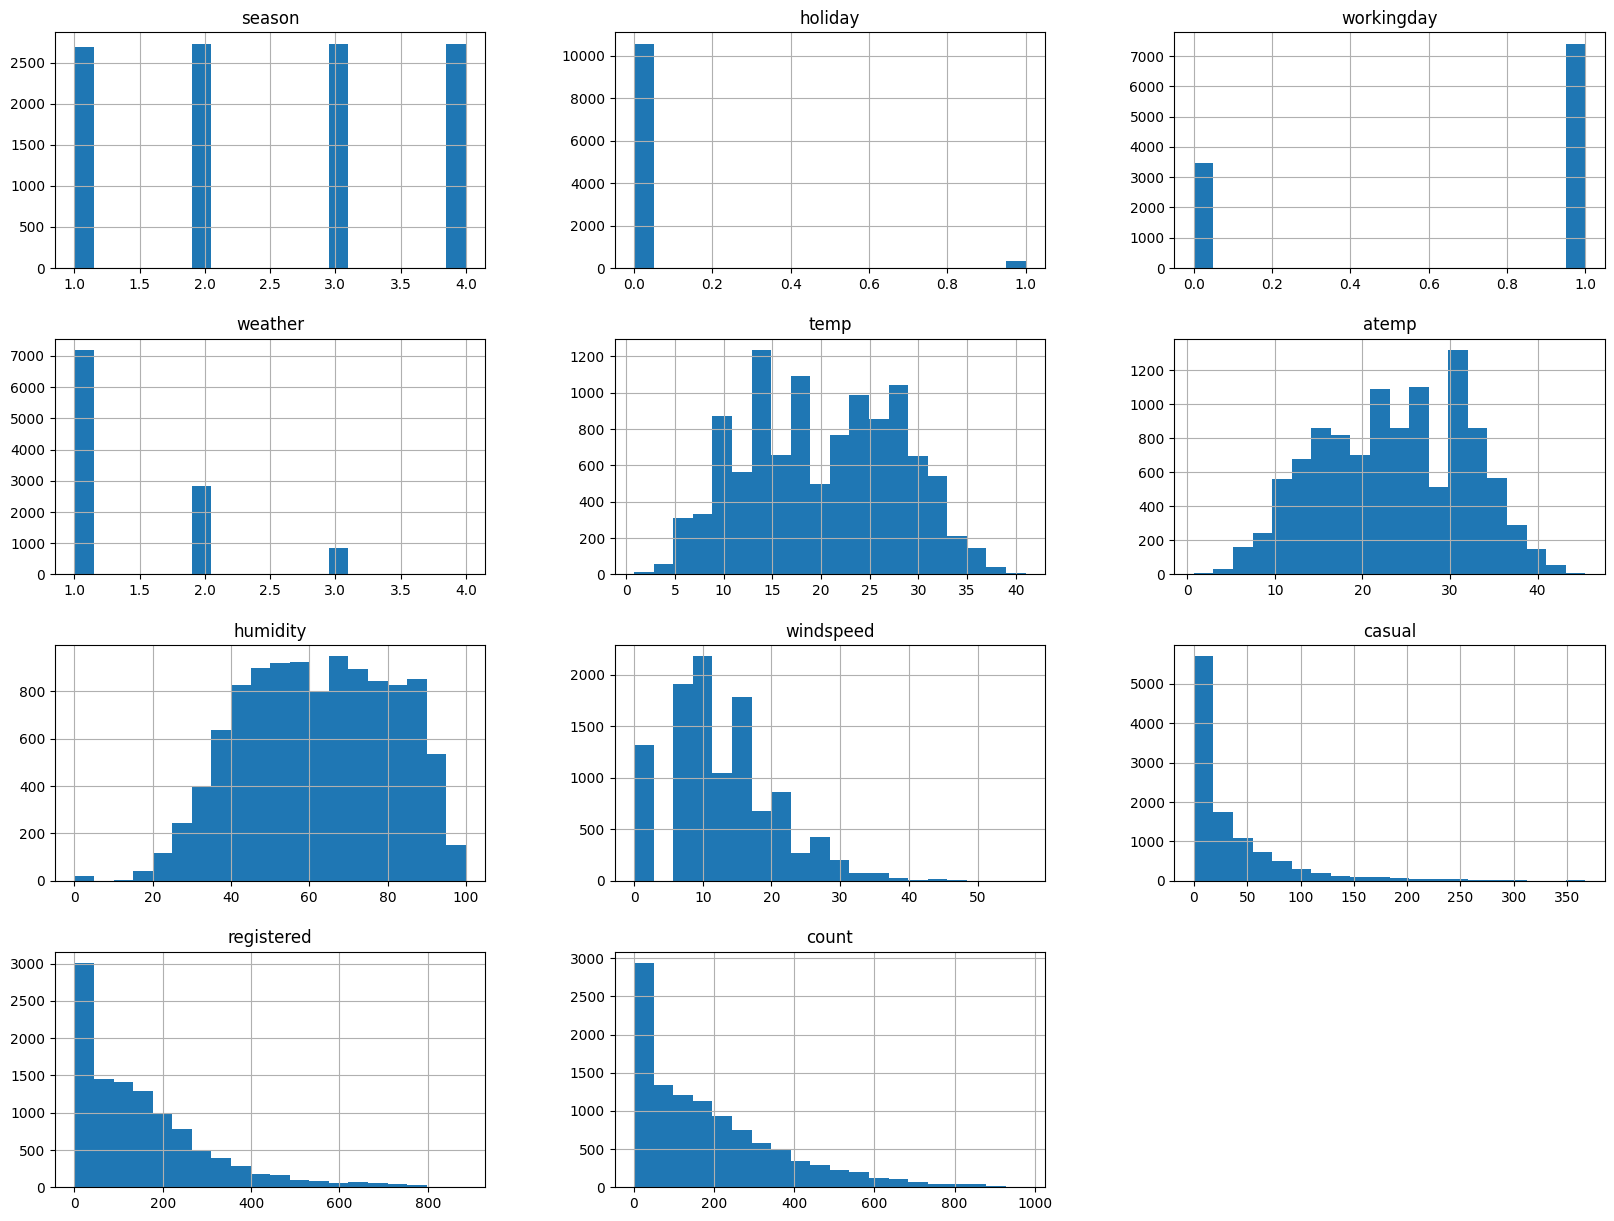

In [19]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(bins=20, figsize=(20,15))

In [20]:
train["datetime"] = pd.to_datetime(train["datetime"])
test["datetime"] = pd.to_datetime(test["datetime"])
# create a new feature
train = train.assign(
    year = train["datetime"].dt.year,
    month = train["datetime"].dt.month,
    day = train["datetime"].dt.day,
    hour = train["datetime"].dt.hour,
)
test = test.assign(
    year = test["datetime"].dt.year,
    month = train["datetime"].dt.month,
    day = train["datetime"].dt.day,
    hour = train["datetime"].dt.hour,
)

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [21]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [22]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

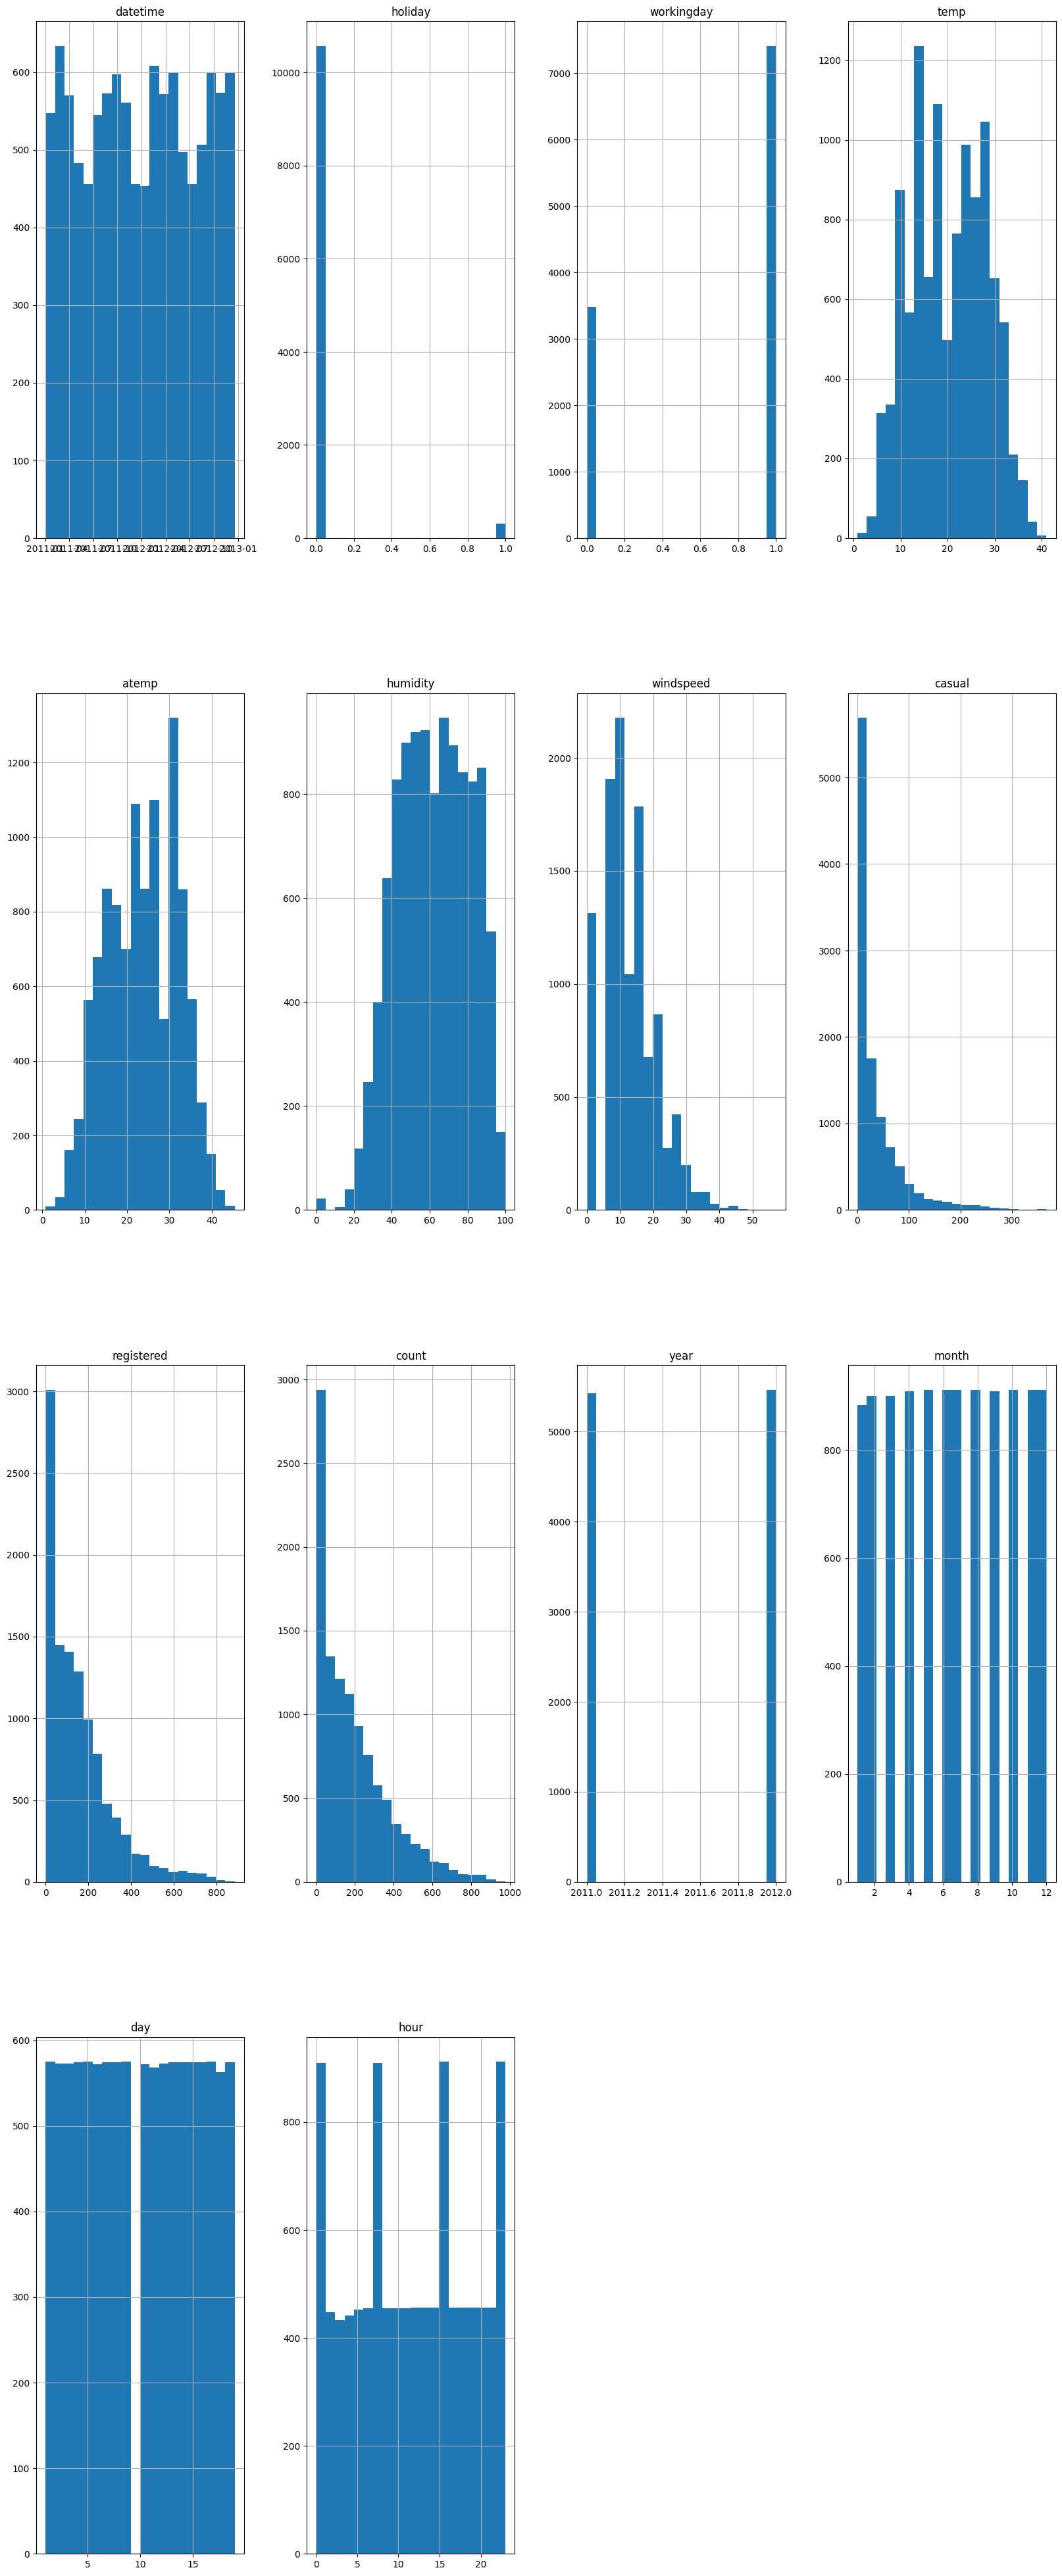

In [23]:
# View histogram of all features again now with the hour feature
train.hist(bins=20, figsize=(20 , 50))

## Step 5: Rerun the model with the same settings as before, just with more features

In [24]:
predictor_new_features = TabularPredictor(label="count", problem_type="regression",eval_metric="root_mean_squared_error").fit(
    train_data=train.drop(columns=["casual", "registered"]),time_limit=600,presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20240809_044810"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          8
Memory Avail:       48.57 GB / 50.99 GB (95.3%)
Disk Space Avail:   164.42 GB / 201.23 GB (81.7%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will b

In [25]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -29.319962  root_mean_squared_error      16.154790  349.679655                0.000945           0.068665            3       True         20
1   NeuralNetFastAI_BAG_L2  -29.597408  root_mean_squared_error      15.651807  297.032004                0.304066          22.215608            2       True         17
2          CatBoost_BAG_L2  -30.382054  root_mean_squared_error      15.419535  317.769014                0.071794          42.952619            2       True         15
3          LightGBM_BAG_L2  -30.569689  root_mean_squared_error      15.589363  279.460498                0.241622           4.644103            2       True         13
4           XGBoost_BAG_L2  -30.857844  root_mean_squared_error      15.536363  279.798660   

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetTorch_BAG_L1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L2': 'StackerEnsembleMode

In [26]:
# Remember to set all negative values to zero
predictor_new_features = predictor_new_features.predict(test)
if (predictor_new_features<0).sum()>0:
    predictor_new_features[predictor_new_features<0] = 0

In [27]:
# Same submitting predictions
submission_new_features = pd.read_csv('submission.csv')
submission_new_features["count"] = predictor_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [28]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:01<00:00, 176kB/s]
Successfully submitted to Bike Sharing Demand

In [29]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_features.csv  2024-08-09 04:59:38  new features                       complete  1.64221      1.64221       
submission.csv               2024-08-09 04:47:27  first raw submission               complete  1.80247      1.80247       
submission_new_features.csv  2024-08-09 04:19:30  new features                       complete  1.70049      1.70049       
submission.csv               2024-08-09 04:07:22  first raw submission               complete  1.80572      1.80572       


#### New Score of `?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [88]:
# Define the predictor object with desired parameters
predictor_new_hpo = TabularPredictor(
    label="count",
    problem_type="regression",
    eval_metric="root_mean_squared_error",
    learner_kwargs={'ignored_columns': ['casual', 'registered']}
)

# Define hyperparameter options
hyperparameters = {
    'GBM': [{'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']
}


# Fit the predictor using the defined parameters and training data
predictor_new_hpo.fit(
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
    train_data=train,
    time_limit=600,
    presets="best_quality"
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240809_063341"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          8
Memory Avail:       48.30 GB / 50.99 GB (94.7%)
Disk Space Avail:   159.21 GB / 201.23 GB (79.1%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will b

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.02%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.02%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.02%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBMXT_BAG_L1/T1 ...
	-34.4539	 = Validation score   (-root_mean_squared_error)
	23.11s	 = Training   runtime
	8.79s	 = Validation runtime
Fitted model: LightGBMXT_BAG_L1/T2 ...
	-36.4781	 = Validation score   (-root_mean_squared_error)
	18.76s	 = Training   runtime
	5.9s	 = Validation runtime
Fitted model: LightGBMXT_BAG_L1/T3 ...
	-34.8543	 = Validation score   (-root_mean_squared_error)
	32.23s	 = Training   runtime
	13.52s	 = Validation runtime
Hyperparameter tuning model: LightGBM_BAG_L1 ... Tuning model for up to 94.57s of the 398.8

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.02%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.02%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.02%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.02%)
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-33.9173	 = Validation score   (-root_mean_squared_error)
	11.7s	 = Training   runtime
	2.56s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	-33.3078	 = Validation score   (-root_mean_squared_error)
	13.05s	 = Training   runtime
	1.13s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T3 ...
	-33.9398	 = Validation score   (-root_mean_squared_error)
	13.02s	 = Training   ru

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.02%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.04%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.03%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.04%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.03%)
Fitted model: LightGBMXT_BAG_L2/T1 ...
	-32.967	 = Validation score   (-root_mean_squared_error)
	6.19s	 = Training   runtime
	0.14s	 = Validation runtime
Fitted model: LightGBMXT_BAG_L2/T2 ...
	-33.653	 = Validation score   (-root_mean_squared_error)
	5.97s	 = Training   runtime
	0.13s	 = Validation runtime
Fitted model: LightGBMXT_

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.02%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.04%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.03%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.04%)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (8 workers, per: cpus=1, gpus=0, memory=0.03%)
Fitted model: LightGBM_BAG_L2/T1 ...
	-32.5126	 = Validation score   (-root_mean_squared_error)
	6.49s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	-33.0707	 = Validation score   (-root_mean_squared_error)
	6.82s	 = Training   runtime
	0.09s	 = Validation runtime
Fitted model: LightGBM_BAG_

In [89]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                   model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0    WeightedEnsemble_L3 -32.364140  root_mean_squared_error      57.564492  202.354239                0.000680           0.019296            3       True         21
1     LightGBM_BAG_L2/T1 -32.512581  root_mean_squared_error      56.048935  170.916144                0.092066           6.488795            2       True         15
2     LightGBM_BAG_L2/T3 -32.642475  root_mean_squared_error      56.082833  171.654099                0.125964           7.226750            2       True         17
3    WeightedEnsemble_L2 -32.643834  root_mean_squared_error      27.748247   90.342223                0.000614           0.018241            2       True          9
4     LightGBM_BAG_L2/T5 -32.703860  root_mean_squared_error      56.023926  171.113325                0.067

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBMXT_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L2/T4': 'StackerEnsembleModel_LGB',
  'LightGBMXT_BAG_L2/T5': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T4': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T5': 'StackerE

In [90]:
predictions = predictor_new_hpo.predict(test)

# Ensure non-negative predictions
predictions[predictions < 0] = 0

# Create the submission dataframe
submission_new_hpo = pd.DataFrame({
    'datetime': test['datetime'],  # Use the datetime from the test dataset
    'count': predictions
})



In [91]:
# Same submitting predictions
submission_new_hpo["count"] = predictor_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [92]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 647k/647k [00:01<00:00, 476kB/s]
Successfully submitted to Bike Sharing Demand

In [93]:
#i realy dont know why this error
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-08-09 06:47:08  new features with hyperparameters  error                                
submission_new_hpo.csv       2024-08-09 05:59:33  new features with hyperparameters  error                                
submission_new_hpo.csv       2024-08-09 05:58:14  new features with hyperparameters  error                                
submission_new_hpo.csv       2024-08-09 05:51:09  new features with hyperparameters  error                                


#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

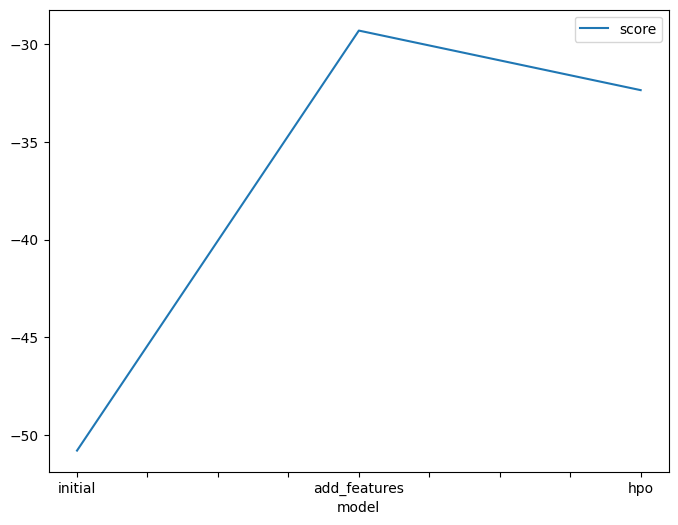

In [85]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [-50.786363,-29.319962,-32.364140 ]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

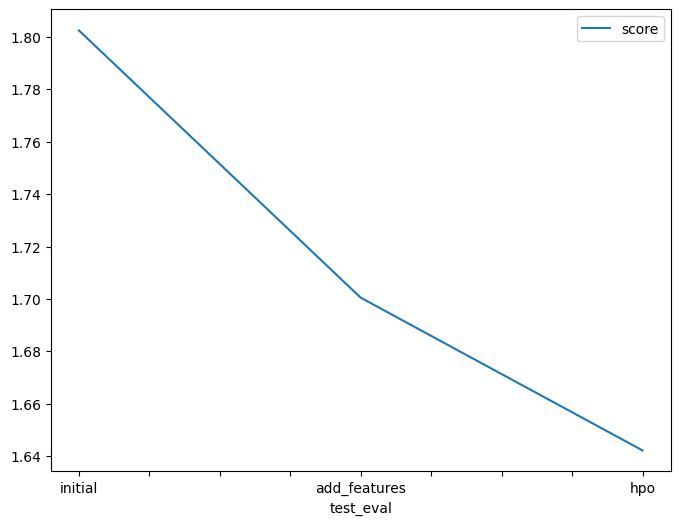

In [86]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80247,1.70049 ,1.64221 ]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [87]:
import pandas as pd

pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["preset=best_quality", "preset=best_quality", "GBM"],
    "hpo2": ["time_limit=600", "time_limit=600", "num_trials=5"],
    "hpo3": ["", "", "searcher=auto"],
   "score": [-50.786363,-29.319962,-32.364140 ]
})

,model,hpo1,hpo2,hpo3,score
0,initial,preset=best_quality,time_limit=600,,-50.786363
1,add_features,preset=best_quality,time_limit=600,,-29.319962
2,hpo,GBM,num_trials=5,searcher=auto,-32.364140
